## Observations and Insights

## Dependencies and starter code

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata= "data/Mouse_metadata.csv"
study_results="data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset

combine_MData_df = pd.merge(mouse_metadata_df, study_results_df, how= 'outer', on='Mouse ID')

combine_MData_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
Drug_MID = combine_MData_df["Mouse ID"].nunique()
Drug_MID

249

## Summary statistics

In [4]:
combine_MData_df.sort_values
combined_MData_df=combine_MData_df.sort_values(["Tumor Volume (mm3)"], ascending=True)

combined_MData_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [6]:
Tumor_Vol = combined_MData_df['Tumor Volume (mm3)']

combined_MData_df['Tumor Volume (mm3)']
Tumor_Mean = Tumor_Vol.mean()
Tumor_Median= Tumor_Vol.median()
Tumor_Var= Tumor_Vol.var()
Tumor_Std= Tumor_Vol.std()
Tumor_Sem= Tumor_Vol.sem()

Tumor_Summary=  [{"Mean": Tumor_Mean,"Median":Tumor_Median,
                 "Variance":Tumor_Var,"Standard Deviation":Tumor_Std,"SEM":Tumor_Sem}]

Tumor_Summary


[{'Mean': 50.44838063133651,
  'Median': 48.95147442,
  'Variance': 79.11607400716646,
  'Standard Deviation': 8.89472169363193,
  'SEM': 0.2044358503496154}]

## Bar plots

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [8]:
Drug_R = combine_MData_df["Drug Regimen"].value_counts()

Drug_R.plot(kind= "bar", facecolor= "blue")


<IPython.core.display.Javascript object>

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

In [10]:
# DATA SET 1
Drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']



In [11]:
Drug_R = combine_MData_df["Drug Regimen"].value_counts()
Drug_R

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [12]:
Drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", 
         "Ceftamin", "Infubinol", "Propriva"]
Treatments = [230, 228, 188, 186,182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(Treatments))
plt.bar(x_axis, Treatments, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo","Ceftamin", "Infubinol", "Propriva"])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo","Ceftamin", "Infubinol", "Propriva"])




([<matplotlib.axis.XTick at 0x10e72f710>,
 <a list of 10 Text xticklabel objects>)

## Pie plots

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [30]:
Male_mice= combined_MData_df[combined_MData_df["Sex"]=="Male"].nunique()
Female_mice = combined_MData_df[combined_MData_df["Sex"]=="Female"].nunique()

Male_mice


Mouse ID              125
Drug Regimen           10
Sex                     1
Age_months             24
Weight (g)             14
Timepoint              10
Tumor Volume (mm3)    834
Metastatic Sites        5
dtype: int64

In [31]:
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [125, 124]

# The colors of each section of the pie chart
colors = ["blue", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1a224a4f10>,
 [Text(-0.7017365844029831, -0.8470925369228766, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.3827654096743544, -0.4620504746852053, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [53]:
#Extract the top 4 regimenes from the data frame in order to perform IQR test on each


In [67]:
best_regimes = combine_MData_df[combine_MData_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes.sort_values (["Timepoint"], ascending=True)
best_regimes
best_regimes_data = best_regimes[["Drug Regimen", "Weight (g)", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_regimes_data




best_regimes_data.head()





,Drug Regimen,Weight (g),Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,16,k403,0,45.000000
1,Ramicane,16,k403,5,38.825898
2,Ramicane,16,k403,10,35.014271
3,Ramicane,16,k403,15,34.223992
4,Ramicane,16,k403,20,32.997729


In [77]:
df_Pivot_T= best_regimes_data.pivot_table(index= ["Timepoint","Weight (g)"] , columns = 'Drug Regimen', values= "Tumor Volume (mm3)") 

df_Pivot_T.reset_index(level = None, inplace = True)


df_Pivot_T.head(20)


Drug Regimen,Timepoint,Weight (g),Capomulin,Ceftamin,Infubinol,Ramicane
0,0,15,45.000000,NaN,NaN,NaN
1,0,16,NaN,NaN,NaN,45.000000
2,0,17,45.000000,NaN,NaN,45.000000
3,0,18,NaN,NaN,NaN,45.000000
4,0,19,45.000000,NaN,NaN,45.000000
5,0,20,45.000000,NaN,NaN,45.000000
6,0,21,45.000000,NaN,NaN,45.000000
7,0,22,45.000000,NaN,NaN,45.000000
8,0,23,45.000000,NaN,45.0,NaN
9,0,24,45.000000,NaN,NaN,45.000000


In [69]:
df_Pivot_T.boxplot(column= ["Capomulin","Ceftamin","Infubinol","Ramicane"])

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [71]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


<IPython.core.display.Javascript object>


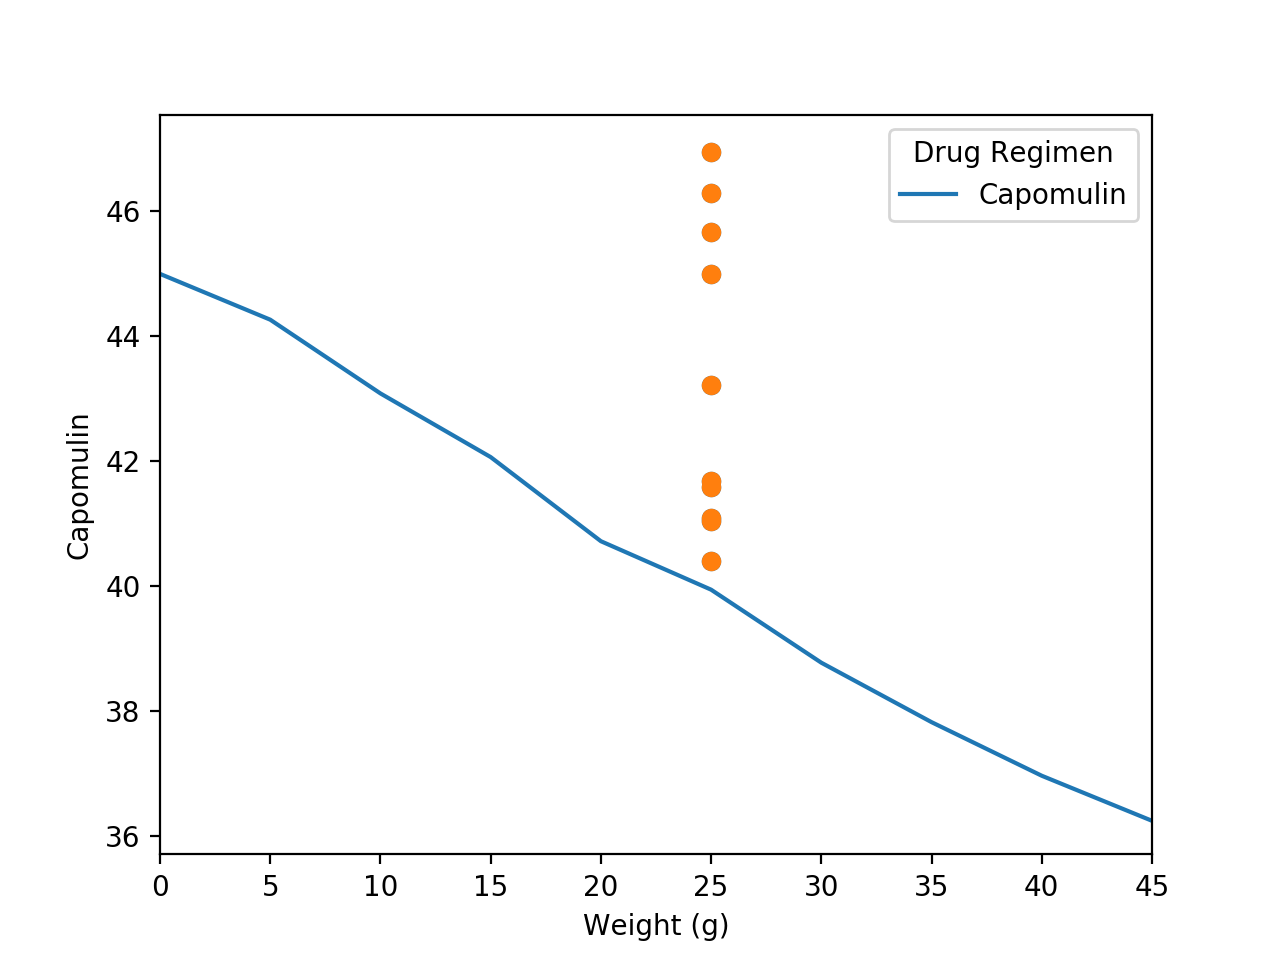

In [72]:
df_Pivot_T.plot(x="Timepoint", y=["Capomulin"])

In [79]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [80]:
df_Pivot_T.head()

Drug Regimen,Timepoint,Weight (g),Capomulin,Ceftamin,Infubinol,Ramicane
0,0,15,45.0,NaN,NaN,NaN
1,0,16,NaN,NaN,NaN,45.0
2,0,17,45.0,NaN,NaN,45.0
3,0,18,NaN,NaN,NaN,45.0
4,0,19,45.0,NaN,NaN,45.0


In [90]:
df_Pivot_TN= df_Pivot_T[np.isfinite(df_Pivot_T['Capomulin'])] 
df_Pivot_TN.head(50)

Drug Regimen,Timepoint,Weight (g),Capomulin,Ceftamin,Infubinol,Ramicane
10,0,25,45.000000,45.000000,45.000000,45.000000
26,5,25,45.667104,46.642021,45.500903,45.224440
42,10,25,46.301950,47.927270,49.657931,44.046354
58,15,25,46.956315,49.184269,51.309055,43.787843
74,20,25,43.225671,51.998649,52.758959,43.470471
90,25,25,41.086991,53.476346,54.920923,43.556942
106,30,25,41.680791,56.254993,57.635532,44.291909
122,35,25,40.401765,58.339141,58.387237,44.181539
138,40,25,41.042045,62.187950,61.574408,43.476811
154,45,25,41.581521,67.527482,64.140097,42.978708


In [95]:

plt.scatter(df_Pivot_TN.iloc [:, 1],df_Pivot_TN.iloc [:, 2])
plt.xlabel("Weight (g)")
plt.ylabel("Capomulin")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [ ]:
Capomulin, Ceftamin, Infubinol, Ramicane .drop(["Ceftamin", "Infubinol", "Ramicane"])